# Car Selling Price Prediction Using **LINEAR REGRESSION**


####**Objective** : To predict a car selling price after being effected by depriciation


####**Data Source** : https://github.com/YBI-Foundation/Dataset/blob/main/Car%20Depriciation.csv

####**Import Library** :

In [674]:
import pandas as pd
import numpy as np
import seaborn as sns

####**Import Data** : 

In [675]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Car%20Depriciation.csv')

####**Describe Data** :

> There are 9 variables in the dataset:
1.   **Car_Name** : name of the car
2.   **Year** : manufacture year
1.   **Selling_Price** : current selling price
2.   **Initial_Price** : initial purchase price
1.   **KM_Driven** : no of kilometers driven
2.   **Fuel_Type** : type of fuel 
1.   **Transmission** : type of transmission
2.   **Owner** : specifies how many times the car has been sold.















In [679]:
df.head()  #gives first five rows of the dataset

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [680]:
df.describe() #gives count,mean,min,max,etc for each numeric type column

,Year,Selling_Price,Initial_Price,KM_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [681]:
df.info() #gives datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Initial_Price  301 non-null    float64
 4   KM_Driven      301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


####**Data Visualization** : 

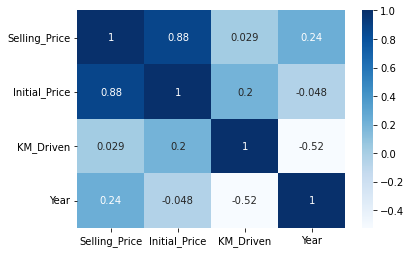

In [676]:
#heatmap of correlations between numeric type columns
sns.heatmap(df[['Selling_Price', 'Initial_Price', 'KM_Driven','Year']].corr(), cmap='Blues', annot=True)

##### Our target variable is "**Selling_Price**" , since there is very low correlation between **selling_price** and **KM_Driven**, we can eliminate **KM_Driven** from feature variables.

####**Data Preprocessing** : 

##### We need to encode the categorical data into numeric format, since our linear model doesn't support categorical data.

In [656]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

####**Target Variable (y) and Feature Variables (X)** : 

In [657]:
y=df['Selling_Price']

In [658]:
X=df[['Year','Initial_Price','Seller_Type','Fuel_Type','Transmission','Owner']]

###**Standardization** :

In [660]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

#####we need to standardize the features, as their means are far apart.

###**Train Test Split** : 

In [661]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2345)

#####we are splitting dataset into 70% train and 30% test sets

###**Modeling**:

In [664]:
lr=LinearRegression()

In [665]:

lr.fit(X_train,y_train)

LinearRegression()

#####our linear regression model has 1 intercept term and 6 slope terms

In [683]:
print('intercept term : ',lr.intercept_)
print('Slope terms : ',lr.coef_)

intercept term :  4.684719545862758
Slope terms :  [ 1.12108032  3.67874456 -0.05345951  0.63808495  0.54409636  0.31279951
  0.11745704]


###**Model Evaluation** : 

In [666]:
y_pred=lr.predict(X_test)

In [668]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [684]:
mean_squared_error(y_test,y_pred)

4.8415107474118235

In [685]:
mean_absolute_error(y_test,y_pred)

1.2373227124594488

In [669]:
r2_score(y_test,y_pred)

0.8429716031073557

#####As we can see, r2 value is 0.8 which is close to 1 i.e 80% of variation of target variable is explained by our model.

###**Prediction** : 

Text(0, 0.5, 'predicted selling price')

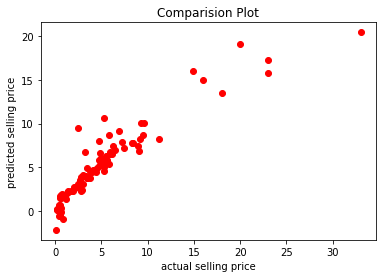

In [692]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='red')
plt.title("Comparision Plot")
plt.xlabel('actual selling price')
plt.ylabel('predicted selling price')

As we can see our scatterplot closely resembles a straight line i.e our linear model predicts the target variable with good accuracy.

hence, our linear model is a **Good Fit**